In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
from src import Spotify
from urllib.parse import urlencode, urlparse
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [245]:
sp = Spotify()

sp.search()
sp.get_genres()
sp.get_features()
sp.get_recommend(get_bak=True)

reco_sp = Spotify(sp.reco_tracks)
reco_sp.get_features()

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit


In [232]:
sp.sel_tracks.head()

,trackId,trackName,artistIds,artistNames,image
0,2SMq0lOqCTHayWa9juoI0d,We Are,5a8EJtOEbUJDF4RX3mKK02,Woo,https://i.scdn.co/image/ab67616d0000b27380af1b...


In [233]:
reco_sp.sel_tracks.head()

,trackId,trackName,artistIds,artistName,image,seedId
0,3o0wqvryehBVqXW4uUmpg9,Armadillo (feat. Omega Sapien & Byung un),6vbKIm1WsvhMMDpthYONc1,Balming Tiger,https://i.scdn.co/image/ab67616d0000b273708226...,2SMq0lOqCTHayWa9juoI0d
1,62eXXGkcDrsf7eyhTDFlgy,SIGN (Feat. Mirani) (Prod. CODE KUNST),0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b273815641...,2SMq0lOqCTHayWa9juoI0d
2,4q9JLlC3HIhN4CDC6KlpYK,iffy (Prod. GroovyRoom),0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b273e70f13...,2SMq0lOqCTHayWa9juoI0d
3,624iXR8lRUaDBDIQxe3SBz,Imagine,"50x9jHrP6wy9fo3jK5pNqS,7p552gLGzaDKXB5sETgTEP","sogumm,DJ Wegun",https://i.scdn.co/image/ab67616d0000b273097733...,2SMq0lOqCTHayWa9juoI0d
4,3NGqVukEbiECo3YgZYzp36,a fence,5a8EJtOEbUJDF4RX3mKK02,Woo,https://i.scdn.co/image/ab67616d0000b273ef7e1e...,2SMq0lOqCTHayWa9juoI0d


In [234]:
from sklearn.metrics import euclidean_distances as euc

my_features = sp.features.iloc[:, 1:].to_numpy()
reco_features = reco_sp.features.iloc[:,1:].to_numpy()

all_features = np.append(my_features, reco_features, axis=0)
_min = all_features.min(axis=0)
_max = all_features.max(axis=0)

_my_features = (my_features - _min) / (_max - _min)
_reco_features = (reco_features - _min) / (_max - _min)

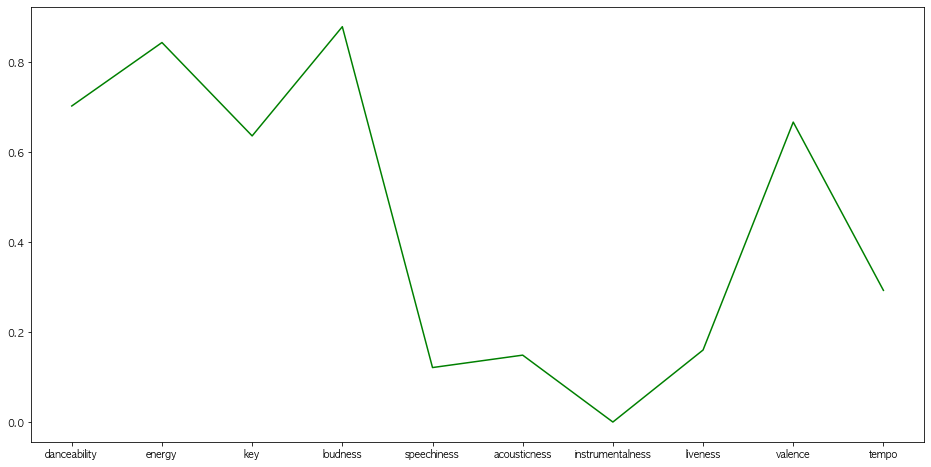

In [235]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

plt.plot(sp.features.columns[1:],_my_features[:].T, color='g')

# plt.savefig("./visual_images/audio-features-ex.png", transparent=True)
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

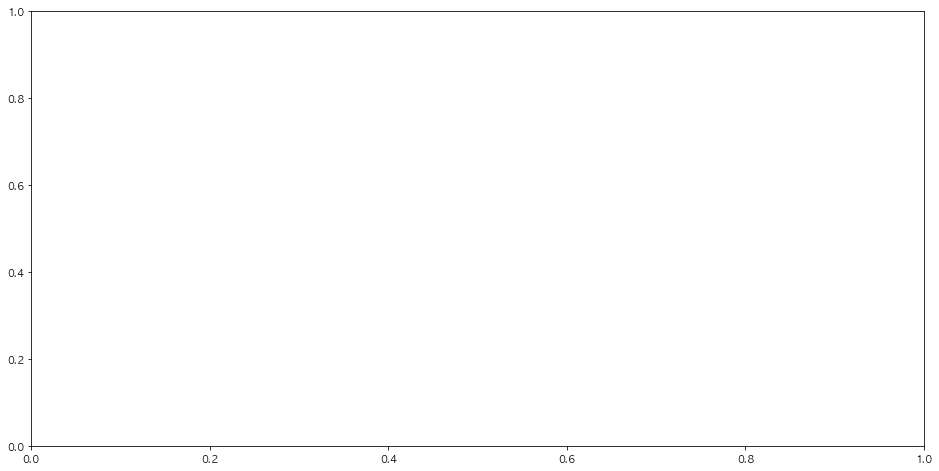

In [236]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

plt.plot(sp.features.columns[1:],_my_features[1], color='g')

# plt.savefig("./visual_images/audio-features-ex.png", transparent=True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.barh(sp.features.columns[1:],_my_features[0], color='white')

plt.savefig("./visual_images/audio-features-ex.png", transparent=True)

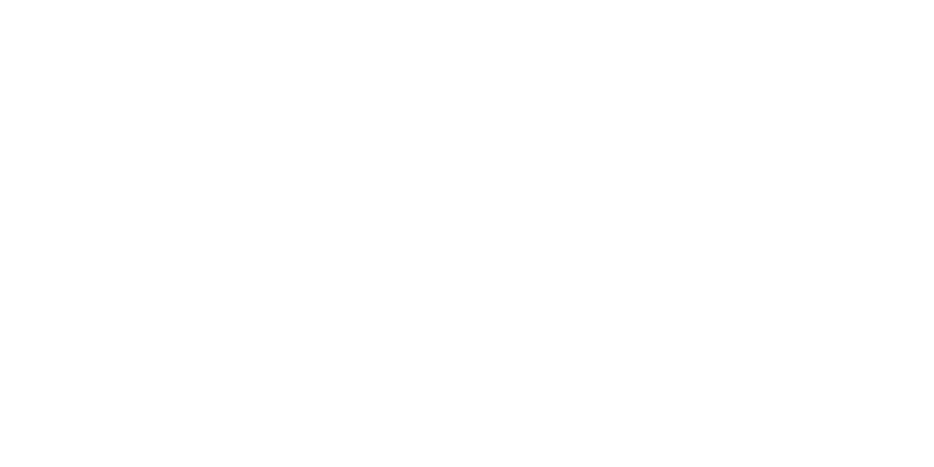

In [237]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:],reco_features.T, color='white', linewidth=0.1)
plt.plot(sp.features.columns[1:],my_features.T, color='white', linewidth=2)

plt.savefig("./visual_images/min-max-norm-ex.png", transparent=True)

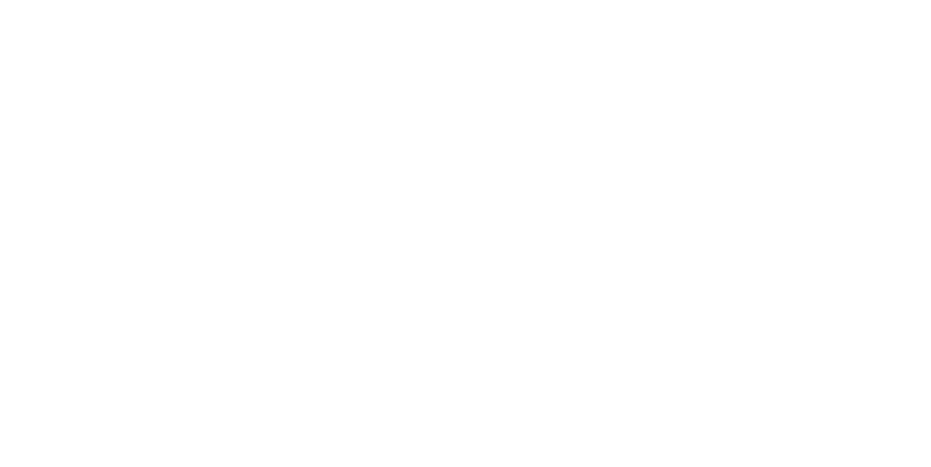

In [238]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:],_reco_features.T, color='white', linewidth=0.1)
plt.plot(sp.features.columns[1:],_my_features.T, color='white', linewidth=2)

plt.savefig("./visual_images/euc-ex.png", transparent=True)

In [239]:
chk = euc(my_features, my_features)
chk_idxes = chk[chk != 0].reshape(-1,len(my_features) - 1).mean(axis=1).argsort()
chk_idxes

ValueError: cannot reshape array of size 0 into shape (0)

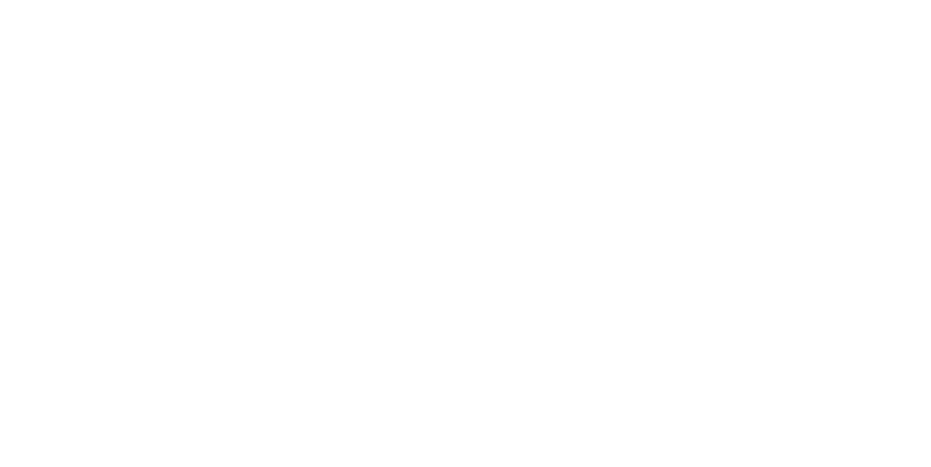

In [240]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:],_reco_features.T, c='white', linewidth=0.05)
plt.plot(sp.features.columns[1:],_my_features.T, c='white', linewidth=1)

plt.savefig("./visual_images/before-filtering.png", transparent=True)

In [241]:
chk_features = reco_sp.sel_tracks.copy()
chk_features.reset_index(inplace=True)
chk_features.drop("index", axis=1, inplace=True)
chk_features['similarity'] = euc(_reco_features,_my_features).mean(axis=1)

chk_features.head()

,trackId,trackName,artistIds,artistName,image,seedId,similarity
0,3o0wqvryehBVqXW4uUmpg9,Armadillo (feat. Omega Sapien & Byung un),6vbKIm1WsvhMMDpthYONc1,Balming Tiger,https://i.scdn.co/image/ab67616d0000b273708226...,2SMq0lOqCTHayWa9juoI0d,0.712573
1,62eXXGkcDrsf7eyhTDFlgy,SIGN (Feat. Mirani) (Prod. CODE KUNST),0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b273815641...,2SMq0lOqCTHayWa9juoI0d,0.505354
2,4q9JLlC3HIhN4CDC6KlpYK,iffy (Prod. GroovyRoom),0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b273e70f13...,2SMq0lOqCTHayWa9juoI0d,0.899628
3,624iXR8lRUaDBDIQxe3SBz,Imagine,"50x9jHrP6wy9fo3jK5pNqS,7p552gLGzaDKXB5sETgTEP","sogumm,DJ Wegun",https://i.scdn.co/image/ab67616d0000b273097733...,2SMq0lOqCTHayWa9juoI0d,0.627857
4,3NGqVukEbiECo3YgZYzp36,a fence,5a8EJtOEbUJDF4RX3mKK02,Woo,https://i.scdn.co/image/ab67616d0000b273ef7e1e...,2SMq0lOqCTHayWa9juoI0d,0.831223


In [242]:
print("필터링 전 평균 유사도",chk_features['similarity'].mean())

필터링 전 평균 유사도 0.8173201797996006


In [244]:
chk_features.sort_values(by=['similarity'])[:3]

,trackId,trackName,artistIds,artistName,image,seedId,similarity
77,4TCahX6bRMGNByARFZcR1G,Green Light (feat.Jay Park),3hzcooxMtbApMTvvn6XKVA,G.NA,https://i.scdn.co/image/ab67616d0000b2731b7a47...,2SMq0lOqCTHayWa9juoI0d,0.284706
51,1KW2m4ofkMZOLSFCb5Hjug,EVERYTHING,75OcDAFGCzj0qehe1mADeM,Way Ched,https://i.scdn.co/image/ab67616d0000b273e09556...,2SMq0lOqCTHayWa9juoI0d,0.342695
5,0JJeoiCAa1hwcBsPxBN2w4,"Sunday (feat. HEIZE, Jay Park)",29HqjVbJr3vsc2l6BTI4eB,GroovyRoom,https://i.scdn.co/image/ab67616d0000b27345774c...,2SMq0lOqCTHayWa9juoI0d,0.350479


IndexError: index 2 is out of bounds for axis 0 with size 1

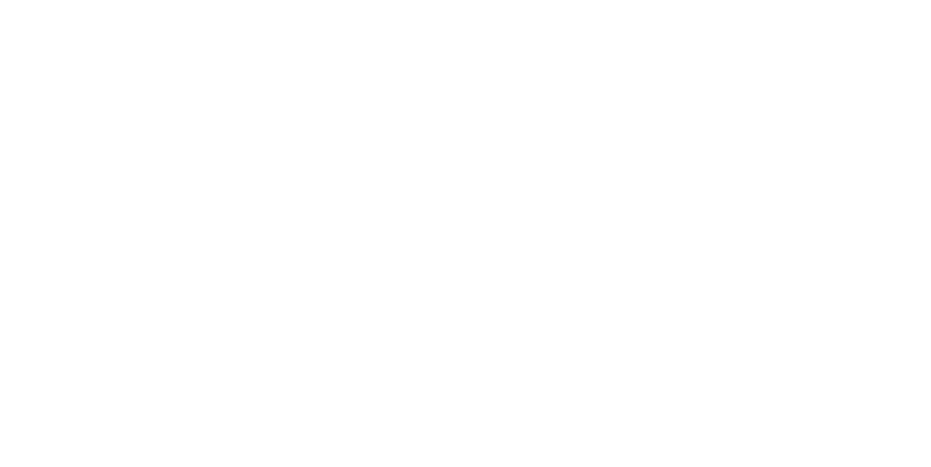

In [226]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:],
         _reco_features[chk_features.sort_values(by=['similarity'])[:100].index].T, c='white', linewidth=0.1)
plt.plot(sp.features.columns[1:],
         _my_features[chk_idxes[:]].T, c='white', linewidth=1)

plt.savefig("./visual_images/after-filtering.png", transparent=True)

In [211]:
print("필터링 후 평균 유사도",chk_features.sort_values(by=['similarity'])[:100]['similarity'].mean())

필터링 후 평균 유사도 0.8709602181977231


In [212]:
chk_features.sort_values(by='similarity')[:100]['seedId'].value_counts()

5quFr5s5PXYfUX5jV2EBZ1    42
2SMq0lOqCTHayWa9juoI0d    33
3w9HSuLDejveVS9G8Qj8i0    22
6guxIn9kHpncfdkrXn2CIQ     3
Name: seedId, dtype: int64